# Atividade Spark 
# Feito por: Alexandre Follador Guedes e Marcello Henrique Martins

Considerando o dataset detalhado a seguir, extraia o conjunto de informações solicitadas.

### Dataset dados de COVID no Brasil

- Arquivo disponível em /home/dados/covid/covid.csv
- Dados relativos a pacientes que realizaram exames de Covid19 no Brasil
- ~1.6GB
- 4.4M de instâncias


|  # | Nome do campo        	| Descrição                                     	|
|----|----------------------	|-----------------------------------------------	|
|  0 | id                   	| identificador                                 	|
|  1 | dataNotificacao      	| Data da notificação                           	|
|  2 | dataInicioSintomas   	| Data do inicio dos sintomas                   	|
|  3 | dataNascimento       	| Data de nascimento                            	|
|  4 | sintomas             	| Sintomas do paciente                          	|
|  5 | profissionalSaude    	| Relacionado a profissional de saúde           	|
|  6 | cbo                  	| Ocupação                                      	|
|  7 | condicoes            	| Condições do paciente                         	|
|  8 | estadoTeste          	| Estado do teste                               	|
|  9 | dataTeste            	| Data do teste                                 	|
| 10 | tipoTeste            	| Tipo de teste realizado                       	|
| 11 | resultadoTeste       	| Resultado do Teste                            	|
| 12 | paisOrigem           	| Pais de Origem do paciente                    	|
| 13 | sexo                 	| Sexo do paciente                              	|
| 14 | bairro               	| Bairro do paciente                            	|
| 15 | estado               	| Estado do paciente                            	|
| 16 | estadoIBGE              	| Estado do paciente IBGE                          	|
| 17 | municipio            	| Municipio do paciente                         	|
| 18 | municipioIBGE          	| Municipio do paciente                         	|
| 19 | cep            	        | CEP                                            	|
| 20 | origem               	| Origem do paciente                            	|
| 21 | cnes                 	| Código da unidade de saúde                    	|
| 22 | estadoNotificacao    	| Estado da notificação                         	|
| 23 | estadoNotificacaoIBGE    | Estado da notificação IBGE                      	|
| 24 | municipioNotificacao 	| Município da notificação                      	|
| 25 | municipioNotificacaoIBGE | Município da notificação IBGE                    	|
| 26 | numeroNotificacao    	| Número da notificação                         	|
| 27 | excluido             	| ID de exclusão                                	|
| 28 | validado             	| Local validação                               	|
| 29 | idade                	| Idade do paciente                             	|
| 30 | dataEncerramento     	| Data do encerramento da avaliação do paciente 	|
| 31 | evolucaoCaso         	| Evolução do caso do paciente                  	|
| 32 | classificacaoFinal   	| Avaliação final do caso                       	|

Informações a serem extraídas:

1. Quantidade de pacientes positivos para corona virus (resultadoTeste)
2. Quantidade de pacientes do sexo feminino positivos para corona virus (resultadoTeste)
3. Quantidade de pacientes de acordo com o sexo e o resultado do teste (resultadoTeste)
4. Sintomas mais comuns para casos positivos para corona virus
5. Sintomas mais comuns para casos não positivos para corona virus
6. Quantidade de casos positivos no Paraná
7. Municipio do Paraná com a maior quantidade de óbitos (evolucaoCaso)
8. Quantidade de municipios no Paraná com casos positivos
9. Quantidade de municipios no Paraná sem casos positivos
10. Estado com a maior taxa de falecimento de mulheres
11. Menor idade de mulher positiva para covid
12. Maior idade de mulher positiva para covid
13. Quantidade de casos positivos, em granularidade diária, ao longo do tempo 
14. Quantidade de casos positivos, em granularidade semanal, ao longo do tempo 
15. Quantidade de pacientes que faleceram (evolucaoCaso) separados pela idade
16. Taxa de óbito (evolucaoCaso) por idade
17. Idade média das mulheres positivas para covid
18. Município do Paraná com a maior quantidade de mulheres positivos para covid
19. Dia da semana com a maior quantidade de testes realizados
20. Dia da semana com maior quantidade de pacientes positivos para corona virus
21. Municipio, com mais de 500 testes, com a maior taxa de exames que não foram positivos para COVID (casos que foram testados porém não tiveram o resultadoTeste como Positivo)

**Dicas:**
- *Crie uma célula (Insert -> Insert Cell Below) para cada informação solicitada*
- *A análise deve ser feita sobre os dados do HDFS*
- *Inicialize o seu cluster executando o script em: Desktop/ambientes/spark/inicializar.sh*
- *Acesse o seu cluster executando o script em: Desktop/ambientes/spark/abrir_navegador.sh*

In [ ]:
# abre sessão no spark
import os
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3'

import pyspark
conf = pyspark.SparkConf()

conf.setMaster('spark://spark-master:7077')

sc = pyspark.SparkContext.getOrCreate()
sc.stop()
sc = pyspark.SparkContext(conf = conf)

In [ ]:
#carrega arquivo do HDFS em um RDD
arquivoRDD = sc.textFile('hdfs://namenode:9000/covid.csv')

In [ ]:
arquivoRDD.map(lambda linha: linha.split(';')[1])\
    .map(lambda data: data[0:4])\
    .filter(lambda ano: ano == '2020')\
    .map(lambda ano: int(ano))\
    .count()

4423752

In [ ]:
arquivoRDD.count()

4424605

In [ ]:
arquivoRDD.take(5)

['id;dataNotificacao;dataInicioSintomas;dataNascimento;sintomas;profissionalSaude;cbo;condicoes;estadoTeste;dataTeste;tipoTeste;resultadoTeste;paisOrigem;sexo;bairro;estado;estadoIBGE;municipio;municipioIBGE;cep;origem;cnes;estadoNotificacao;estadoNotificacaoIBGE;municipioNotificacao;municipioNotificacaoIBGE;numeroNotificacao;excluido;validado;idade;dataEncerramento;evolucaoCaso;classificacaoFinal',
 'q2ggiMBd6V;2020-03-20T05:00:00.000Z;2020-03-13T05:00:00.000Z;1999-04-26T05:00:00.000Z;Dor de Garganta;Não;null;null;Concluído;2020-03-20T05:00:00.000Z;RT-PCR;Negativo;undefined;Masculino;VARZEA;MINAS GERAIS;31;Brumadinho;3109006;69980;undefined;undefined;ACRE;12;Rio Branco;1200401;122000006949;undefined;undefined;21;"";"";Descartado',
 'rBR15eblo5;2020-04-26T16:18:17.903Z;2020-04-20T05:00:00.000Z;1949-10-02T05:00:00.000Z;Dispneia, Outros, Dor de Garganta;Não;null;Doenças cardíacas crônicas;Coletado;2020-04-26T05:00:00.000Z;null;null;undefined;Masculino;PINHAES;PARANÁ;41;Curitiba;4106902;"

In [ ]:
# exames por estado
arquivoRDD.map(lambda linha: linha.split(';')[15])\
    .map(lambda estado: [estado, 1])\
    .reduceByKey(lambda valor1, valor2: valor1 + valor2)\
    .sortBy(lambda entrada: entrada[1], ascending=False)\
    .filter(lambda entrada: entrada[1] > 1000)\
    .take(10)

[('SÃO PAULO', 2083442),
 ('MINAS GERAIS', 585110),
 ('BAHIA', 559746),
 ('RIO GRANDE DO SUL', 440413),
 ('RIO DE JANEIRO', 418934),
 ('SANTA CATARINA', 294990),
 ('PARANÁ', 41969)]

In [ ]:
#informacao 1  - Quantidade de pacientes positivos para corona virus (resultadoTeste)

arquivoRDD.map(lambda resultado: resultado.split(';')[11])\
    .filter(lambda resultado: resultado == 'Positivo')\
    .count()

1230210

In [ ]:
#informacao 2 - Quantidade de pacientes do sexo feminino positivos para corona virus (resultadoTeste)

arquivoRDD.map(lambda linha: linha.split(';')[11:14])\
    .map(lambda retorna: [retorna[0], retorna[2]])\
    .filter(lambda sexo: sexo[1] == 'Feminino')\
    .filter(lambda sexo: sexo[0] == 'Positivo')\
    .count()
    #.take(5)

632899

In [ ]:
#informacao 3 - Quantidade de pacientes de acordo com o sexo e o resultado do teste (resultadoTeste)

arquivoRDD.map(lambda linha: linha.split(';')[11:14])\
    .map(lambda retorna: [retorna[0], retorna[2]])\
    .map(lambda retorna: [retorna[1] + ' ' + retorna[0],1])\
    .reduceByKey(lambda valor1, valor2: valor1 + valor2)\
    .sortBy(lambda entrada: entrada[1], ascending=False)\
    .filter(lambda entrada: entrada[1] > 1000)\
    .collect()

[('Feminino Negativo', 1318173),
 ('Masculino Negativo', 1141559),
 ('Feminino Positivo', 632899),
 ('Masculino Positivo', 578177),
 ('Feminino null', 371661),
 ('Masculino null', 274303),
 ('Indefinido Negativo', 88174),
 ('Indefinido Positivo', 19117)]

In [ ]:
#informacao 4 - Sintomas mais comuns para casos positivos para corona virus

arquivoRDD.map(lambda linha: [linha.split(';')[4],linha.split(';')[11]])\
    .filter(lambda x: x[1] == 'Positivo')\
    .flatMap(lambda x: [x.strip().lower() for x in x[0].split(',')])\
    .map(lambda x: [x, 1])\
    .reduceByKey(lambda a,b: a + b)\
    .sortBy(lambda entrada: entrada[1], ascending=False)\
    .take(4)

[('outros', 841588),
 ('tosse', 576175),
 ('febre', 462087),
 ('dor de garganta', 290157)]

In [ ]:
#informacao 5 - Sintomas mais comuns para casos não positivos para corona virus

arquivoRDD.map(lambda linha: [linha.split(';')[4],linha.split(';')[11]])\
    .filter(lambda x: x[1] == 'Negativo')\
    .flatMap(lambda x: [x.strip().lower() for x in x[0].split(',')])\
    .map(lambda x: [x, 1])\
    .reduceByKey(lambda a,b: a + b)\
    .sortBy(lambda entrada: entrada[1], ascending=False)\
    .take(4)

[('outros', 1676861),
 ('tosse', 774024),
 ('dor de garganta', 522740),
 ('febre', 497189)]

In [ ]:
#informacao 6 - Quantidade de casos positivos no Paraná

arquivoRDD.map(lambda linha: [linha.split(';')[11],linha.split(';')[15]])\
    .filter(lambda x: x[0] == 'Positivo')\
    .filter(lambda x: x[1] == 'PARANÁ')\
    .count()

6183

In [ ]:
#informacao 7 - Municipio do Paraná com a maior quantidade de óbitos (evolucaoCaso)

arquivoRDD.map(lambda linha: [linha.split(';')[15]
                              ,linha.split(';')[17]
                              ,linha.split(';')[31]
                             ])\
    .filter(lambda x: x[0] == 'PARANÁ' and x[2] == 'Óbito')\
    .map(lambda x: [x[1], 1])\
    .reduceByKey(lambda a,b: a + b)\
    .sortBy(lambda entrada: entrada[1], ascending=False)\
    .max(lambda x: x[1])

('Foz do Iguaçu', 25)

In [ ]:
#informacao 8 - Quantidade de municipios no Paraná com casos positivos

arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[15]
                              ,linha.split(';')[17]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'PARANÁ')\
    .map(lambda x: x[2])\
    .groupBy(lambda x: x)\
    .count()

296

In [ ]:
#informacao 9 - Quantidade de municipios no Paraná sem casos positivos

# Não existe informação de que a base possui todos os municípios do Paraná. Assim, atrubuí a uma 
# variável o número de municípios e subtraí da quantidade de positivos

total_municipios = 399
total_municipios - arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[15]
                              ,linha.split(';')[17]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'PARANÁ')\
    .map(lambda x: x[2])\
    .groupBy(lambda x: x)\
    .count()

103

In [ ]:
#informacao 10 - Estado com a maior taxa de falecimento de mulheres

total_estado = arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[15]
                              ,linha.split(';')[31]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino')\
    .map(lambda x: [x[2], 1])\
    .reduceByKey(lambda a,b: a + b)\
    .collect()

In [ ]:
obito_estado = arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[15]
                              ,linha.split(';')[31]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino' and x[3] == 'Óbito')\
    .map(lambda x: [x[2], 1])\
    .reduceByKey(lambda a,b: a + b)\
    .collect()

In [ ]:
i = 0
todos = {}
for estado, total in total_estado:
    print('Taxa em {}: {}%'.format(estado,(obito_estado[i][1]/total)*100))
    i += 1

Taxa em SANTA CATARINA: 0.20389438270975632%
Taxa em RIO DE JANEIRO: 0.6494326070244283%
Taxa em RIO GRANDE DO SUL: 0.10874447412590718%
Taxa em MINAS GERAIS: 0.8960016573441062%
Taxa em SÃO PAULO: 0.07052602574363953%
Taxa em BAHIA: 1.3769228183783904%
Taxa em PARANÁ: 0.12674271229404308%


In [ ]:
#informacao 11 - Menor idade de mulher positiva para covid

arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[29]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino')\
    .min(lambda x: x[2])

['Positivo', 'Feminino', '0']

In [ ]:
#informacao 12 - Maior idade de mulher positiva para covid

arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[29]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino')\
    .max(lambda x: x[2])

['Positivo', 'Feminino', '99']

In [ ]:
#informacao 13 - Quantidade de casos positivos, em granularidade diária, ao longo do tempo 
positivo_por_dia = arquivoRDD.map(lambda linha: [linha.split(';')[1]
                             ,linha.split(';')[11]])\
    .filter(lambda x: x[1] == 'Positivo')\
    .map(lambda data: [data[0][0:10],1])\
    .reduceByKey(lambda a,b: a + b)\
    .sortBy(lambda x: x[0], ascending=True)\
    .collect()

In [ ]:
import matplotlib.pyplot as plt
x = [a for a, b in positivo_por_dia]
y = [b for a, b in positivo_por_dia]

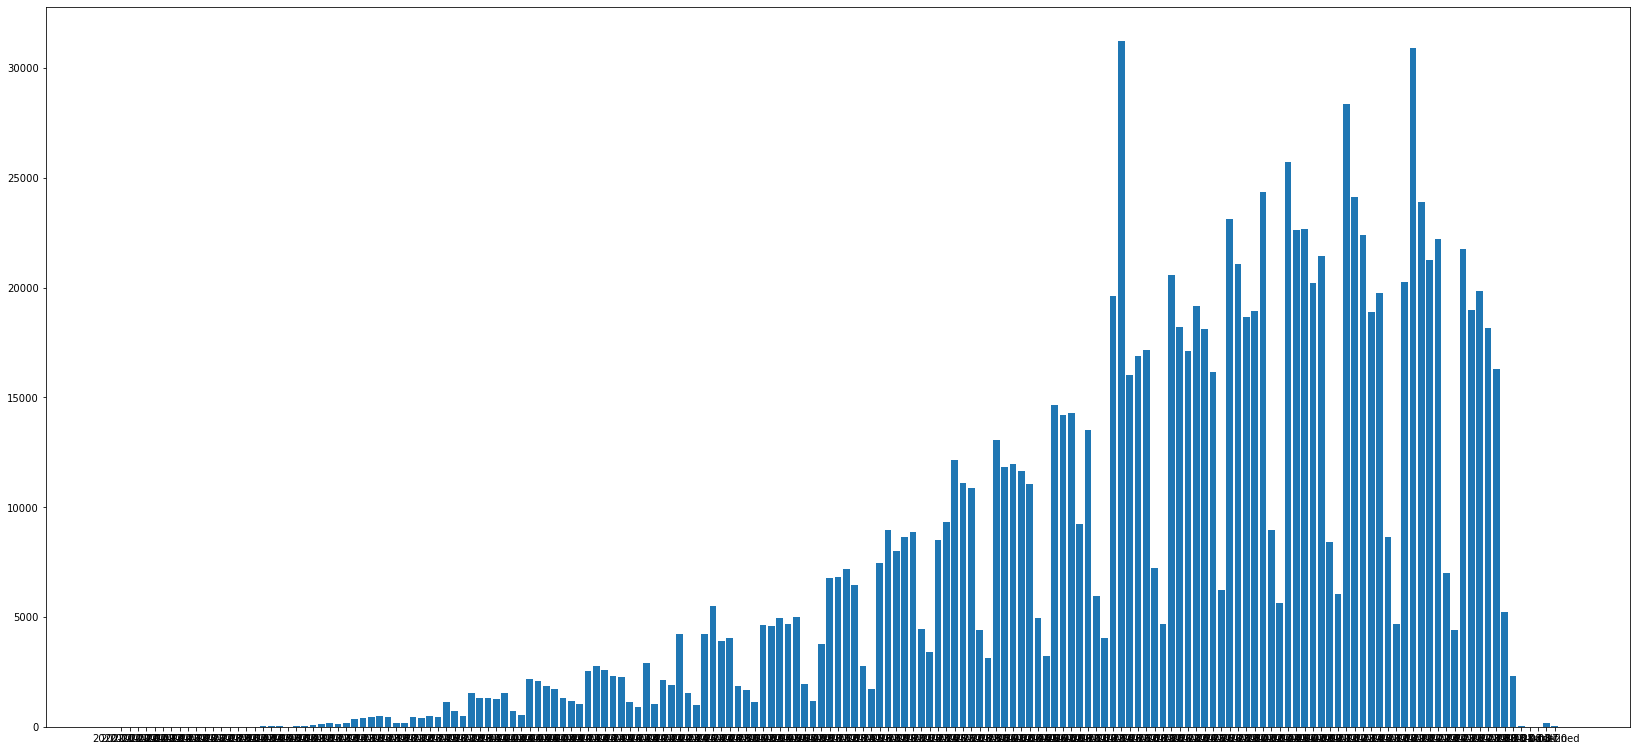

In [ ]:
fig = plt.figure(figsize=(22,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [ ]:
#informacao 14 - Quantidade de casos positivos, em granularidade semanal, ao longo do tempo
from datetime import datetime

In [ ]:
def get_semana(x):
    try:
        semana = datetime.strptime(x[0][:10], '%Y-%m-%d').isocalendar()[1]
    except:
        semana = 'Null'
    return semana

In [ ]:
positivo_semana = arquivoRDD.map(lambda linha: [linha.split(';')[1]
                             ,linha.split(';')[11]])\
    .filter(lambda x: x[1] == 'Positivo')\
    .map(lambda x: [get_semana(x), 1])\
    .reduceByKey(lambda a, b: a + b)\
    .filter(lambda x: x[0] != 'Null')\
    .sortBy(lambda x: int(x[0]), ascending=True)\
    .collect()

In [ ]:
x = [a for a, b in positivo_semana]
y = [b for a, b in positivo_semana]

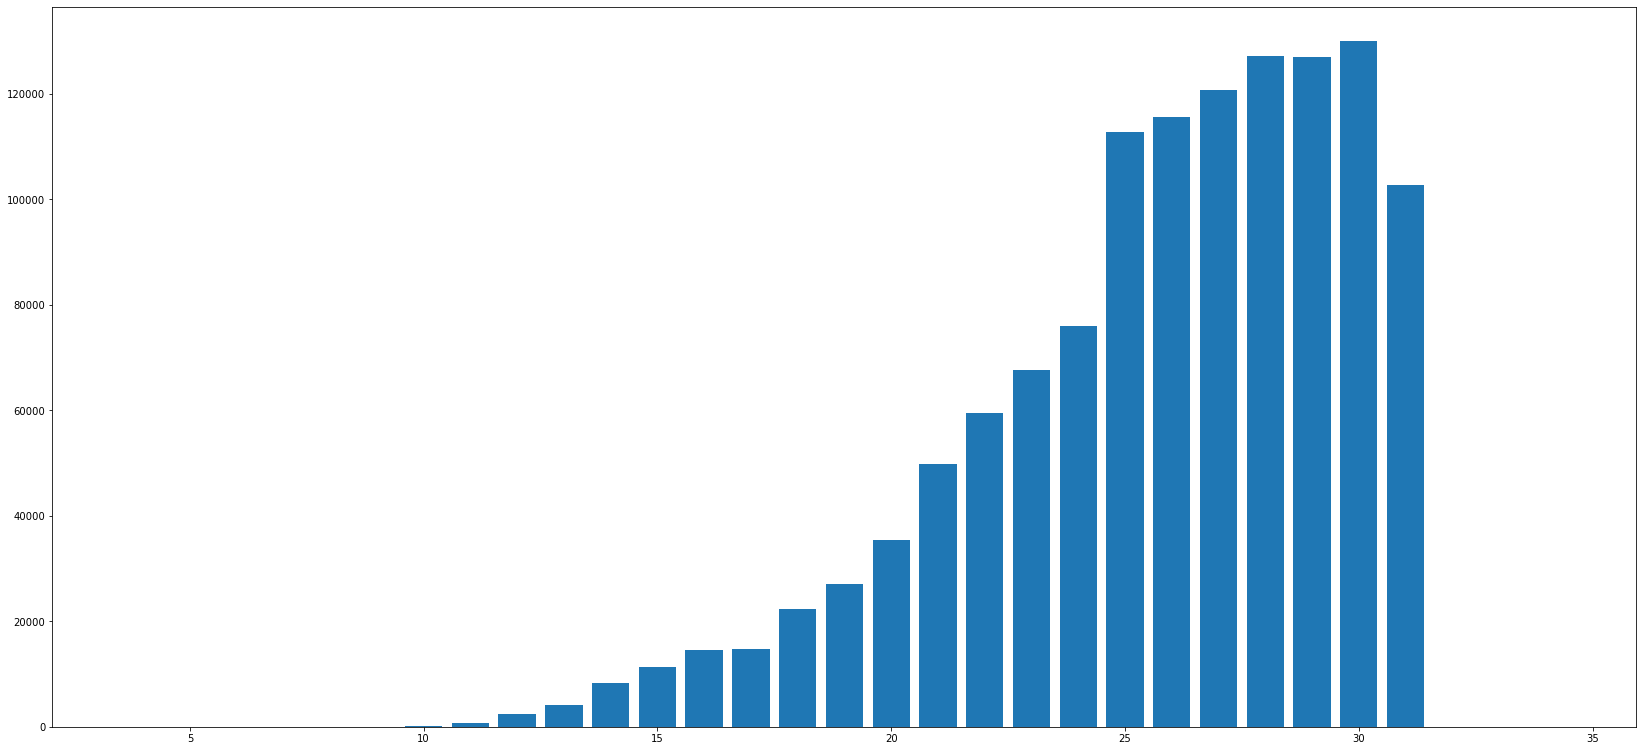

In [ ]:
fig = plt.figure(figsize=(22,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [ ]:
#informacao 15 - Quantidade de pacientes que faleceram (evolucaoCaso) separados pela idade

info_15 = arquivoRDD.map(lambda linha: [linha.split(';')[29], linha.split(';')[31]])\
    .filter(lambda x: x[1] == 'Óbito')\
    .map(lambda x: [x[0], 1])\
    .reduceByKey(lambda a, b: a + b)\
    .sortBy(lambda x: int(x[0]), ascending=True)\
    .collect()


In [ ]:
x = [a for a, b in info_15]
y = [b for a, b in info_15]

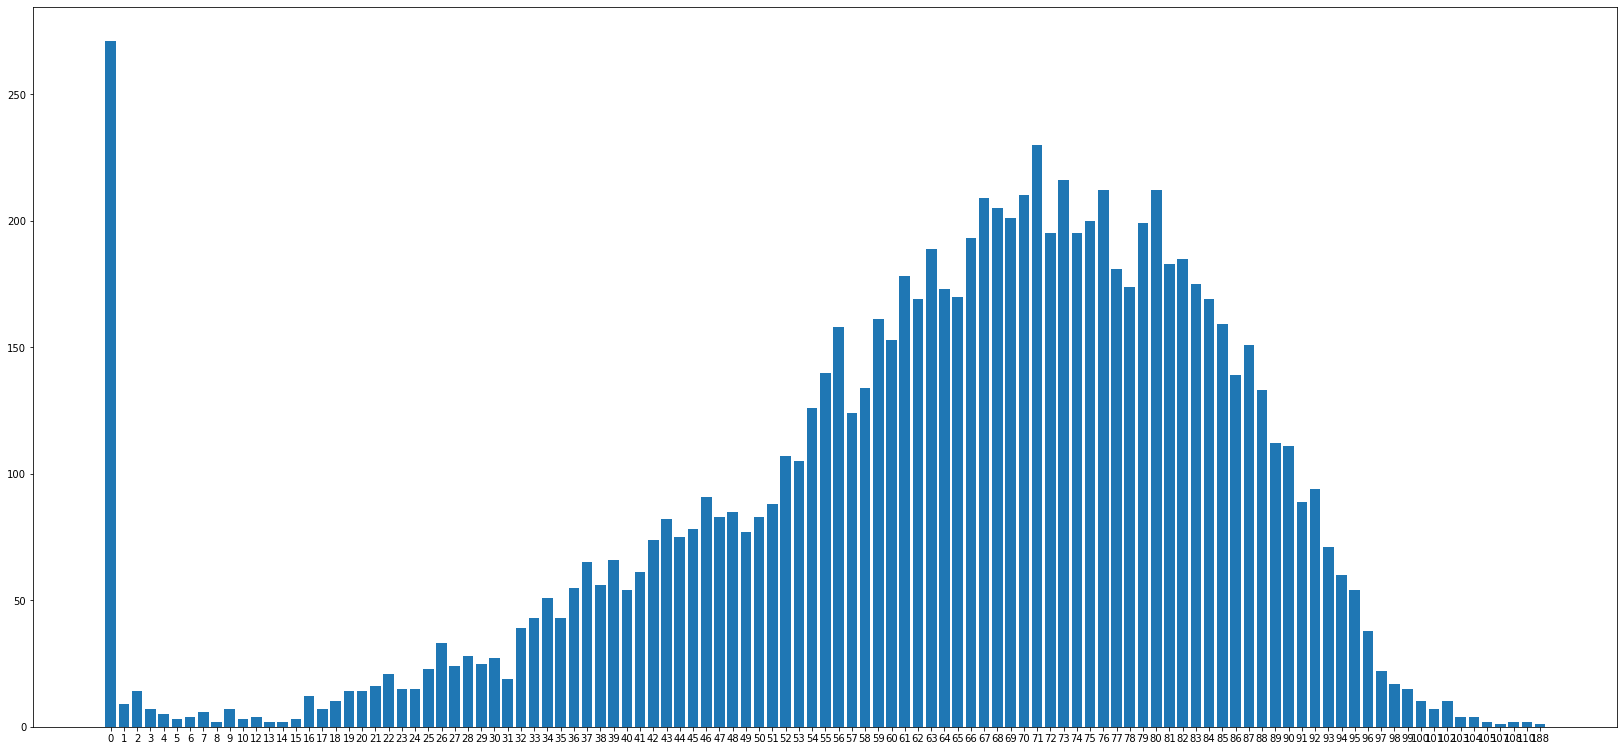

In [ ]:
fig = plt.figure(figsize=(22,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [ ]:
#informacao 16 - Taxa de óbito (evolucaoCaso) por idade

total_obitos = arquivoRDD.map(lambda linha: linha.split(';')[31])\
    .filter(lambda x: x == 'Óbito')\
    .count()

In [ ]:
i = 0
for idade, total in info_15:
    print('Taxa em {} anos: {}%'.format(idade,(info_15[i][1]/total_obitos)*100))
    i += 1

Taxa em 0 anos: 2.9672615788897403%
Taxa em 1 anos: 0.09854374247235301%
Taxa em 2 anos: 0.15329026606810467%
Taxa em 3 anos: 0.07664513303405233%
Taxa em 4 anos: 0.05474652359575167%
Taxa em 5 anos: 0.032847914157451%
Taxa em 6 anos: 0.04379721887660134%
Taxa em 7 anos: 0.065695828314902%
Taxa em 8 anos: 0.02189860943830067%
Taxa em 9 anos: 0.07664513303405233%
Taxa em 10 anos: 0.032847914157451%
Taxa em 12 anos: 0.04379721887660134%
Taxa em 13 anos: 0.02189860943830067%
Taxa em 14 anos: 0.02189860943830067%
Taxa em 15 anos: 0.032847914157451%
Taxa em 16 anos: 0.131391656629804%
Taxa em 17 anos: 0.07664513303405233%
Taxa em 18 anos: 0.10949304719150334%
Taxa em 19 anos: 0.15329026606810467%
Taxa em 20 anos: 0.15329026606810467%
Taxa em 21 anos: 0.17518887550640536%
Taxa em 22 anos: 0.229935399102157%
Taxa em 23 anos: 0.164239570787255%
Taxa em 24 anos: 0.164239570787255%
Taxa em 25 anos: 0.2518340085404577%
Taxa em 26 anos: 0.361327055731961%
Taxa em 27 anos: 0.262783313259608%
Taxa e

In [ ]:
#informacao 17 - Idade média das mulheres positivas para covid

total_mulheres = arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[29]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino')\
    .count()

In [ ]:
soma_idade = sum(arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[29]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino')\
    .map(lambda x: int(x[2]))\
    .collect())

In [ ]:
print('Media de idade: ' + str(soma_idade/total_mulheres))

Media de idade: 40.96124658120806


In [ ]:
#informacao 18 - Município do Paraná com a maior quantidade de mulheres positivos para covid

arquivoRDD.map(lambda linha: [linha.split(';')[11]
                              ,linha.split(';')[13]
                              ,linha.split(';')[15]
                              ,linha.split(';')[17]])\
    .filter(lambda x: x[0] == 'Positivo' and x[1] == 'Feminino' and x[2] == 'PARANÁ')\
    .map(lambda x: [x[3],1])\
    .reduceByKey(lambda a, b: a + b)\
    .sortBy(lambda x: x[1], ascending=False)\
    .take(5)

[('Curitiba', 903),
 ('Colombo', 95),
 ('São José dos Pinhais', 94),
 ('Londrina', 91),
 ('Foz do Iguaçu', 79)]

In [ ]:
#informacao 19 - Dia da semana com a maior quantidade de testes realizados

weekDays = ("Segunda","Terca","Querta","Quinta","Sexta","Sabado","Domingo")

def get_dia_semana(x):
    try:
        dia_semana = datetime.strptime(x[:10], '%Y-%m-%d').weekday()
    except:
        dia_semana = 'Null'
    return dia_semana


In [ ]:
mais_testes = arquivoRDD.map(lambda linha: linha.split(';')[9])\
    .map(lambda x: [get_dia_semana(x), 1])\
    .reduceByKey(lambda a, b: a + b)\
    .max(lambda x: x[1])

In [ ]:
print(f'Dia da semana com mais testes realizados: {weekDays[mais_testes[0]]} com {mais_testes[1]} testes')


Dia da semana com mais testes realizados: Segunda com 842570 testes


In [ ]:
#informacao 20 - Dia da semana com maior quantidade de pacientes positivos para corona virus

mais_positivo = arquivoRDD.map(lambda linha: [linha.split(';')[9]
                              ,linha.split(';')[11]])\
    .filter(lambda x: x[1] == 'Positivo')\
    .map(lambda x: [get_dia_semana(x[0]), 1])\
    .reduceByKey(lambda a, b: a + b)\
    .max(lambda x: x[1])

In [ ]:
print(f'Dia da semana com mais pacientes positivos: {weekDays[mais_positivo[0]]} com {mais_positivo[1]} pacientes')

Dia da semana com mais pacientes positivos: Segunda com 240597 pacientes


In [ ]:
#informacao 21 - Municipio, com mais de 500 testes, com a maior taxa de exames que não foram positivos
#                para COVID (casos que foram testados porém não tiveram o resultadoTeste como Positivo)
#.map(lambda x: [x[0] + '_' + x[1],1])\
#.reduceByKey(lambda a,b: a+b)\

mais_500 = arquivoRDD.map(lambda linha: [linha.split(';')[17]
                             ,linha.split(';')[11]])\
    .map(lambda x: [x[0], 1])\
    .reduceByKey(lambda a, b: a + b)\
    .filter(lambda a: a[1] >= 500)\
    .collect()

In [ ]:
positivos = arquivoRDD.map(lambda linha: [linha.split(';')[17]
                             ,linha.split(';')[11]])\
    .filter(lambda a: a[1] == 'Positivo')\
    .map(lambda x: [x[0],1])\
    .reduceByKey(lambda a, b: a + b)\
    .collect()

In [ ]:
def tup_to_dict(tup, di):
    di = dict(tup)
    return di

In [ ]:
dic_positivos = {}

In [ ]:
dic_positivos = tup_to_dict(positivos,dic_positivos)

In [ ]:
lista_taxa = []
for i in mais_500:
    taxa = dic_positivos[i[0]] / i[1]
    lista_taxa.append((i[0],taxa))

In [ ]:
print(max(lista_taxa, key=lambda i: i[1]))

('Rio De Janeiro', 0.8479630880036012)
